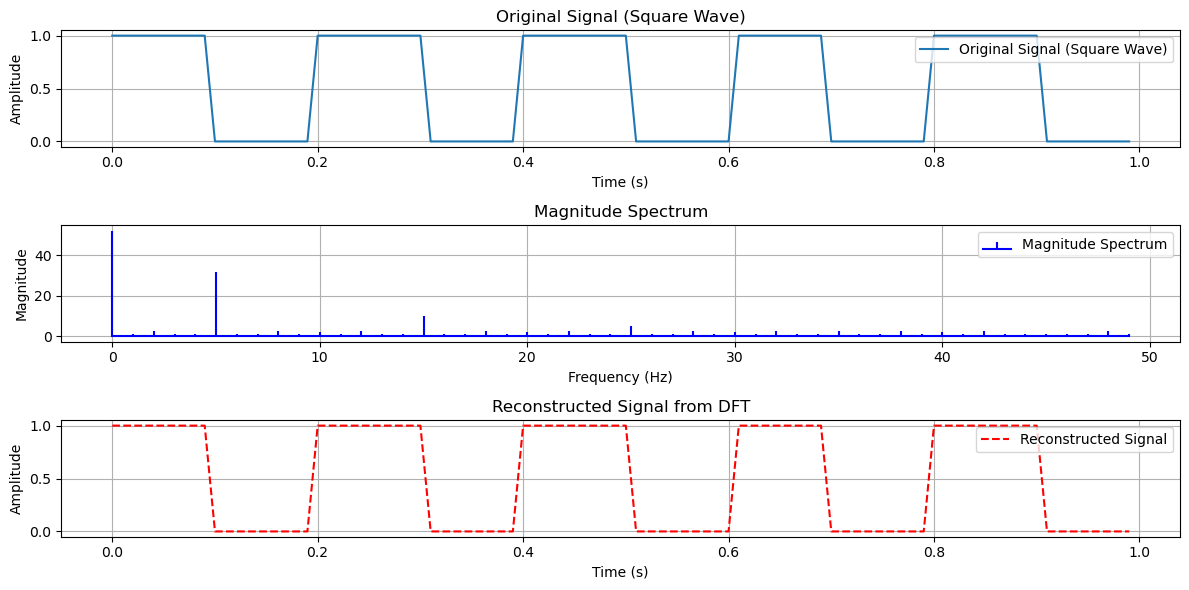

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Signal Definition
def define_signal(t):
    """
    Define the square wave as a function of time.

    :param t: Time array
    :return: Signal values (square wave)
    """
    frequency = 5  # Frequency of the square wave in Hz
    period = 1 / frequency  # Period of the square wave
    return np.where((t % period) < (period / 2), 1, 0)  # Unit step periodic square wave

# DFT Implementation
def DFT(signal, T_s):
    """
    Compute the Discrete Fourier Transform (DFT) of a sampled signal.
    
    :param signal: Array of sampled signal values
    :param T_s: Sampling period
    :return: Frequency components (Y), frequencies (f_m)
    """
    N = len(signal)  # Number of samples
    Y = np.zeros(N, dtype=complex)  # Initialize DFT array
    for m in range(N):
        for n in range(N):
            Y[m] += signal[n] * np.exp(-1j * 2 * np.pi * m * n / N)
    f_m = np.fft.fftfreq(N, T_s)  # Frequencies in Hz
    return Y, f_m

# IDFT Implementation
def IDFT(Y):
    """
    Compute the Inverse Discrete Fourier Transform (IDFT) of the frequency components.
    
    :param Y: Array of frequency components
    :return: Reconstructed signal
    """
    N = len(Y)
    signal_reconstructed = np.zeros(N, dtype=complex)
    for n in range(N):
        for m in range(N):
            signal_reconstructed[n] += Y[m] * np.exp(1j * 2 * np.pi * m * n / N)
    return signal_reconstructed.real / N  # Normalize by N

# Main Program
if __name__ == "__main__":
    # Parameters
    T_s = 0.01  # Sampling period (seconds)
    N = 100  # Number of samples
    t0 = 0.0  # Initial time
    
    # Time samples: t = t0 + nT_s
    t = t0 + np.arange(N) * T_s  # Time array starting from t0

    # Define the signal (Square wave)
    signal = define_signal(t)

    # Perform DFT
    Y, f_m = DFT(signal, T_s)

    # Perform IDFT
    signal_reconstructed = IDFT(Y)

    # Plot original signal
    plt.figure(figsize=(12, 6))
    plt.subplot(3, 1, 1)
    plt.plot(t, signal, label="Original Signal (Square Wave)")
    plt.title("Original Signal (Square Wave)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.legend()

    # Plot magnitude spectrum
    plt.subplot(3, 1, 2)
    plt.stem(f_m[:N//2], np.abs(Y)[:N//2], 'b', markerfmt=" ", basefmt="-b", label="Magnitude Spectrum")
    plt.title("Magnitude Spectrum")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid()
    plt.legend()

    # Plot reconstructed signal
    plt.subplot(3, 1, 3)
    plt.plot(t, signal_reconstructed, '--r', label="Reconstructed Signal")
    plt.title("Reconstructed Signal from DFT")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()


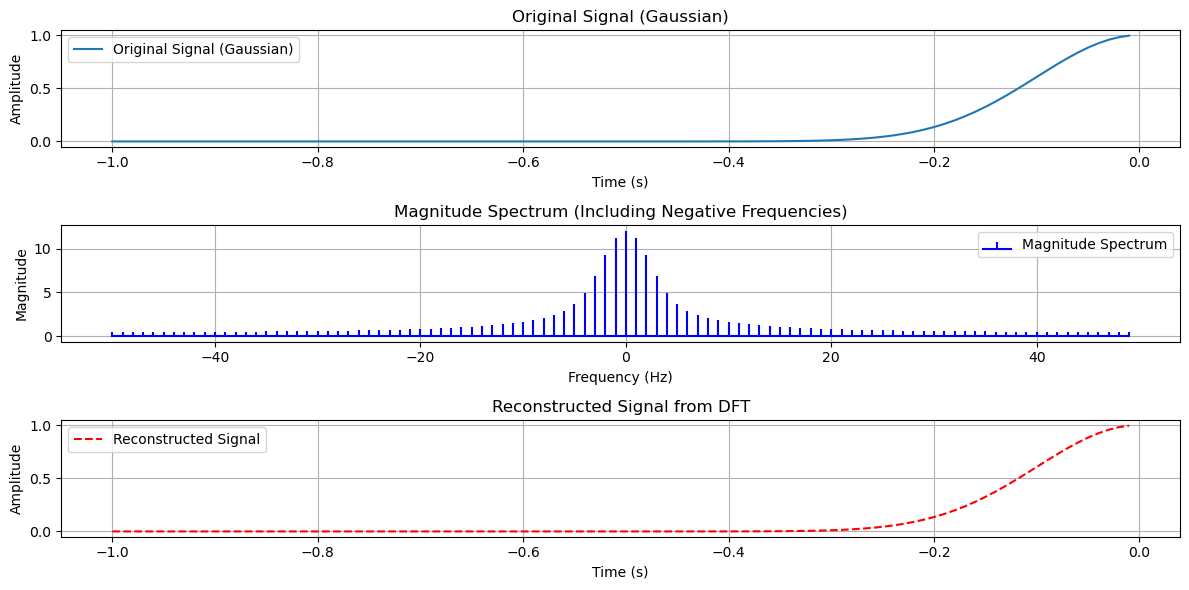

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Signal Definition
def define_signal(t):
    """
    Define a Gaussian signal as a function of time.

    :param t: Time array
    :return: Signal values (Gaussian)
    """
    A = 1.0       # Amplitude of the Gaussian
    mu = 0.0      # Mean of the Gaussian (center)
    sigma = 0.1   # Standard deviation (controls width)
    return A * np.exp(-((t - mu)**2) / (2 * sigma**2))  # Gaussian formula

# DFT Implementation
def DFT(signal, T_s):
    """
    Compute the Discrete Fourier Transform (DFT) of a sampled signal.
    
    :param signal: Array of sampled signal values
    :param T_s: Sampling period
    :return: Frequency components (Y), frequencies (f_m)
    """
    N = len(signal)  # Number of samples
    Y = np.zeros(N, dtype=complex)  # Initialize DFT array
    for m in range(N):
        for n in range(N):
            Y[m] += signal[n] * np.exp(-1j * 2 * np.pi * m * n / N)
    f_m = np.fft.fftfreq(N, T_s)  # Frequencies in Hz
    return Y, f_m

# IDFT Implementation
def IDFT(Y):
    """
    Compute the Inverse Discrete Fourier Transform (IDFT) of the frequency components.
    
    :param Y: Array of frequency components
    :return: Reconstructed signal
    """
    N = len(Y)
    signal_reconstructed = np.zeros(N, dtype=complex)
    for n in range(N):
        for m in range(N):
            signal_reconstructed[n] += Y[m] * np.exp(1j * 2 * np.pi * m * n / N)
    return signal_reconstructed.real / N  # Normalize by N

# Main Program
if __name__ == "__main__":
    # Parameters
    T_s = 0.01  # Sampling period (seconds)
    N = 100  # Number of samples
    t0 = -1.0  # Initial time
    
    # Time samples: t = t0 + nT_s
    t = t0 + np.arange(N) * T_s  # Time array starting from t0

    # Define the signal (Gaussian)
    signal = define_signal(t)

    # Perform DFT
    Y, f_m = DFT(signal, T_s)

    # Perform IDFT
    signal_reconstructed = IDFT(Y)

    # Plot original signal
    plt.figure(figsize=(12, 6))
    plt.subplot(3, 1, 1)
    plt.plot(t, signal, label="Original Signal (Gaussian)")
    plt.title("Original Signal (Gaussian)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.legend()

    # Plot magnitude spectrum including negative frequencies
    plt.subplot(3, 1, 2)
    plt.stem(f_m, np.abs(Y), 'b', markerfmt=" ", basefmt="-b", label="Magnitude Spectrum")
    plt.title("Magnitude Spectrum (Including Negative Frequencies)")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid()
    plt.legend()

    # Plot reconstructed signal
    plt.subplot(3, 1, 3)
    plt.plot(t, signal_reconstructed, '--r', label="Reconstructed Signal")
    plt.title("Reconstructed Signal from DFT")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()
